Caracteristicas:  
id = id  
marca = brand  
modelo = model  
ano = year  
quilometragem = miles  **--> 1 milha(miles) = 1.60934 quilometros (km)**  
consumo na cidade = city_mileage  **--> 1 MPG ~= 0.425 km/L** -- ex: 25 MPG x 0.425 = 10,63 km/L  
consumo na rodovia = highway_mileage  **--> 1 MPG ~= 0.425 km/L**  
potência = horsepower  **--> HP ~= 0.986 cv --> 1 cv ~= 1.0139 HP**  
torque = torque  
capacidade do motor em litro = engine_capacity_litre  **--> Lê se motor 1.0 ou motor 1.5 etc**  
capacidade do combustivel = fuel_capacity  **--> Medida Americana = Galão = 1 galão = 3.785 litros**  
número de cilindros = num_cylinder  
número de assentos = num_seat  
número de proprietários = num_owners  
preço = price  
link = link  
condição = condition  
tipo = type  
número de portas = door  
tração nas rodas = wheel_drive    
tipo de motor = engine_type    
Câmbio do veiculo = speed_levels  
altura livre dianteira = front_headroom   **--> 1 polegada = 2.54 cm**  
espaço para pernas dinateiro = front_legroom  **--> 1 polegada = 2.54 cm**  
altura livre traseira = rear_headroom  **--> 1 polegada = 2.54 cm**  
espaço para pernas traseiro = rear_legroom  **--> 1 polegada = 2.54 cm**  
registros de manutenção/serviços =  service_records

### Vamos realizar as análises iniciais dos dados brutos da empresas autotrader e carfax, Faremos inicialmente análises estatística descritivas e exploratória de todas as variáveis do modelo.

In [5]:
# Importe das libs
import pandas as pd
import numpy as np
import scipy as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm # Criada para criar um modelo diferente de regressão linear

In [6]:
df_cars = pd.read_csv('cars.csv', sep=',')

In [7]:
# Criando um copia dos dados original para preservá-los
df_cars_copia = df_cars.copy()
df_cars_copia

,id,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,...,type,doors,wheel_drive,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
0,3,Chevrolet,Volt LT,2019,27173,43,42,149,294,1.5,...,sedan,4,2,hybrid_gas_electric,6.0,37.8,42.1,35.8,34.7,4
1,6,Hyundai,Elantra SE,2017,76941,29,38,146,132,2.0,...,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,16
2,7,Ford,Focus,2014,97027,27,37,159,146,2.0,...,sedan,4,2,gas,6.0,38.3,43.7,38.0,33.2,13
3,8,Honda,Civic,2016,95396,31,42,158,138,1.5,...,sedan,4,2,gas,6.0,37.5,42.3,36.8,37.4,26
4,9,Hyundai,Elantra SE,2019,28405,29,38,147,132,2.0,...,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,5
5,11,Honda,Civic,2016,61459,31,41,158,138,2.0,...,sedan,4,2,gas,6.0,37.5,42.3,36.8,37.4,13
6,12,Subaru,Legacy,2022,6811,27,35,182,176,2.5,...,sedan,4,4,gas,6.0,39.4,42.8,37.2,39.5,6
7,13,Honda,Clarity,2018,29674,44,40,212,99,1.5,...,sedan,4,2,hybrid_gas_electric,NaN,39.1,42.2,37.1,36.2,2
8,14,Volkswagen,Jetta,2019,25044,30,40,147,184,1.4,...,sedan,4,2,gas,8.0,38.5,41.1,37.2,37.4,6
9,15,Volkswagen,Jetta,2017,26215,28,38,150,184,1.4,...,sedan,4,2,gas,6.0,38.2,41.2,37.1,38.1,13


In [8]:
# Analisar os tipos dos atributos
df_cars_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     52 non-null     int64  
 1   brand                  52 non-null     object 
 2   model                  52 non-null     object 
 3   year                   52 non-null     int64  
 4   miles                  52 non-null     int64  
 5   city_mileage           52 non-null     int64  
 6   highway_mileage        52 non-null     int64  
 7   horsepower             52 non-null     int64  
 8   torque                 52 non-null     int64  
 9   engine_capacity_litre  52 non-null     float64
 10  fuel_capacity          52 non-null     float64
 11  num_cylinder           52 non-null     int64  
 12  num_seat               52 non-null     int64  
 13  num_owners             52 non-null     int64  
 14  price                  52 non-null     int64  
 15  link    

In [9]:
# Valores nulos
df_cars_copia.isnull().sum()

id                        0
brand                     0
model                     0
year                      0
miles                     0
city_mileage              0
highway_mileage           0
horsepower                0
torque                    0
engine_capacity_litre     0
fuel_capacity             0
num_cylinder              0
num_seat                  0
num_owners                0
price                     0
link                      0
condition                51
type                      0
doors                     0
wheel_drive               0
engine_type               0
speed_levels              1
front_headroom            0
front_legroom             0
rear_headroom             0
rear_legroom              0
service_records           0
dtype: int64

In [10]:
# Valor total de nulos

print(f'Valor total de nulos: {df_cars_copia.isnull().sum().sum()}')
print(f'Porcentagem em relação ao total dos dados: {(df_cars_copia.isnull().sum().sum() / len(df_cars)) / 100}%')

Valor total de nulos: 52
Porcentagem em relação ao total dos dados: 0.01%


In [11]:
# mediana da coluna speed_levels
mediana_speed_levels = df_cars_copia['speed_levels'].median()
mediana_speed_levels

6.0

### Referentes ao valores nulos serão tomadas duas ações:  
**.1º** A coluna condition será excluida pois só temos um valor válido, sendo assim não teremos nenhuma distorção que venha a atrapalhar análises e modelos futuros que iremos rodar;  
**.2**  A coluna id não será necessária para nossa análise então também irei excluí-lá junto com a coluna condition  
**.3** A coluna speed_levels só tem um valor nulo com base nos valores da coluna irei utilizar a técnica de susbtituição útilizando a técnica da mediana da coluna, que foi **6**

In [12]:
# Dropando coluna condition e preenchendo valor nulo da coluna speed_levels com a mediana da coluna.
df_cars_copia = df_cars_copia.drop(['condition', 'id', 'link'], axis=1)

df_cars_copia = df_cars_copia.fillna(mediana_speed_levels)

display(df_cars_copia)

,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,...,type,doors,wheel_drive,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
0,Chevrolet,Volt LT,2019,27173,43,42,149,294,1.5,8.9,...,sedan,4,2,hybrid_gas_electric,6.0,37.8,42.1,35.8,34.7,4
1,Hyundai,Elantra SE,2017,76941,29,38,146,132,2.0,14.0,...,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,16
2,Ford,Focus,2014,97027,27,37,159,146,2.0,12.4,...,sedan,4,2,gas,6.0,38.3,43.7,38.0,33.2,13
3,Honda,Civic,2016,95396,31,42,158,138,1.5,12.4,...,sedan,4,2,gas,6.0,37.5,42.3,36.8,37.4,26
4,Hyundai,Elantra SE,2019,28405,29,38,147,132,2.0,14.0,...,sedan,4,2,gas,6.0,39.0,42.2,37.0,35.7,5
5,Honda,Civic,2016,61459,31,41,158,138,2.0,12.4,...,sedan,4,2,gas,6.0,37.5,42.3,36.8,37.4,13
6,Subaru,Legacy,2022,6811,27,35,182,176,2.5,18.5,...,sedan,4,4,gas,6.0,39.4,42.8,37.2,39.5,6
7,Honda,Clarity,2018,29674,44,40,212,99,1.5,7.0,...,sedan,4,2,hybrid_gas_electric,6.0,39.1,42.2,37.1,36.2,2
8,Volkswagen,Jetta,2019,25044,30,40,147,184,1.4,13.2,...,sedan,4,2,gas,8.0,38.5,41.1,37.2,37.4,6
9,Volkswagen,Jetta,2017,26215,28,38,150,184,1.4,14.5,...,sedan,4,2,gas,6.0,38.2,41.2,37.1,38.1,13


In [13]:
df_cars_copia.loc[:, 'engine_type'].values

array(['hybrid_gas_electric', 'gas', 'gas', 'gas', 'gas', 'gas', 'gas',
       'hybrid_gas_electric', 'gas', 'gas', 'gas', 'gas', 'gas', 'gas',
       'gas', 'gas', 'gas', 'gas', 'hybrid_gas_electric', 'gas', 'gas',
       'gas', 'gas', 'gas', 'gas', 'gas', 'gas', 'gas', 'gas', 'gas',
       'gas', 'gas', 'gas', 'gas', 'gas', 'gas', 'gas', 'gas', 'gas',
       'gas', 'gas', 'gas', 'gas', 'gas', 'gas', 'gas', 'gas', 'gas',
       'gas', 'gas', 'gas', 'gas'], dtype=object)

In [14]:
# Transfomando coluna engine_type com labelencoder
tipo_motor_trans = df_cars_copia.loc[:, 'engine_type']
labelencoder = LabelEncoder()
df_cars_copia['engine_type'] = labelencoder.fit_transform(tipo_motor_trans)
df_cars_copia
# hybrid_gas_electric = 1 e gas = 0

,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,...,type,doors,wheel_drive,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
0,Chevrolet,Volt LT,2019,27173,43,42,149,294,1.5,8.9,...,sedan,4,2,1,6.0,37.8,42.1,35.8,34.7,4
1,Hyundai,Elantra SE,2017,76941,29,38,146,132,2.0,14.0,...,sedan,4,2,0,6.0,39.0,42.2,37.0,35.7,16
2,Ford,Focus,2014,97027,27,37,159,146,2.0,12.4,...,sedan,4,2,0,6.0,38.3,43.7,38.0,33.2,13
3,Honda,Civic,2016,95396,31,42,158,138,1.5,12.4,...,sedan,4,2,0,6.0,37.5,42.3,36.8,37.4,26
4,Hyundai,Elantra SE,2019,28405,29,38,147,132,2.0,14.0,...,sedan,4,2,0,6.0,39.0,42.2,37.0,35.7,5
5,Honda,Civic,2016,61459,31,41,158,138,2.0,12.4,...,sedan,4,2,0,6.0,37.5,42.3,36.8,37.4,13
6,Subaru,Legacy,2022,6811,27,35,182,176,2.5,18.5,...,sedan,4,4,0,6.0,39.4,42.8,37.2,39.5,6
7,Honda,Clarity,2018,29674,44,40,212,99,1.5,7.0,...,sedan,4,2,1,6.0,39.1,42.2,37.1,36.2,2
8,Volkswagen,Jetta,2019,25044,30,40,147,184,1.4,13.2,...,sedan,4,2,0,8.0,38.5,41.1,37.2,37.4,6
9,Volkswagen,Jetta,2017,26215,28,38,150,184,1.4,14.5,...,sedan,4,2,0,6.0,38.2,41.2,37.1,38.1,13


In [ ]:
# Transformando a coluna brand com hotenconder
#df_cars_copia = pd.get_dummies(df_cars_copia, columns=['brand'])
#df_cars_copia

,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,num_cylinder,...,front_legroom,rear_headroom,rear_legroom,service_records,brand_Chevrolet,brand_Ford,brand_Honda,brand_Hyundai,brand_Subaru,brand_Volkswagen
0,Volt LT,2019,27173,43,42,149,294,1.5,8.9,4,...,42.1,35.8,34.7,4,True,False,False,False,False,False
1,Elantra SE,2017,76941,29,38,146,132,2.0,14.0,4,...,42.2,37.0,35.7,16,False,False,False,True,False,False
2,Focus,2014,97027,27,37,159,146,2.0,12.4,4,...,43.7,38.0,33.2,13,False,True,False,False,False,False
3,Civic,2016,95396,31,42,158,138,1.5,12.4,4,...,42.3,36.8,37.4,26,False,False,True,False,False,False
4,Elantra SE,2019,28405,29,38,147,132,2.0,14.0,4,...,42.2,37.0,35.7,5,False,False,False,True,False,False
5,Civic,2016,61459,31,41,158,138,2.0,12.4,4,...,42.3,36.8,37.4,13,False,False,True,False,False,False
6,Legacy,2022,6811,27,35,182,176,2.5,18.5,4,...,42.8,37.2,39.5,6,False,False,False,False,True,False
7,Clarity,2018,29674,44,40,212,99,1.5,7.0,4,...,42.2,37.1,36.2,2,False,False,True,False,False,False
8,Jetta,2019,25044,30,40,147,184,1.4,13.2,4,...,41.1,37.2,37.4,6,False,False,False,False,False,True
9,Jetta,2017,26215,28,38,150,184,1.4,14.5,4,...,41.2,37.1,38.1,13,False,False,False,False,False,True


In [15]:
#Transformando tipo da coluna price de int64 para float64
df_cars_copia['price'] = df_cars_copia['price'].astype('float64')
df_cars_copia

,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,...,type,doors,wheel_drive,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
0,Chevrolet,Volt LT,2019,27173,43,42,149,294,1.5,8.9,...,sedan,4,2,1,6.0,37.8,42.1,35.8,34.7,4
1,Hyundai,Elantra SE,2017,76941,29,38,146,132,2.0,14.0,...,sedan,4,2,0,6.0,39.0,42.2,37.0,35.7,16
2,Ford,Focus,2014,97027,27,37,159,146,2.0,12.4,...,sedan,4,2,0,6.0,38.3,43.7,38.0,33.2,13
3,Honda,Civic,2016,95396,31,42,158,138,1.5,12.4,...,sedan,4,2,0,6.0,37.5,42.3,36.8,37.4,26
4,Hyundai,Elantra SE,2019,28405,29,38,147,132,2.0,14.0,...,sedan,4,2,0,6.0,39.0,42.2,37.0,35.7,5
5,Honda,Civic,2016,61459,31,41,158,138,2.0,12.4,...,sedan,4,2,0,6.0,37.5,42.3,36.8,37.4,13
6,Subaru,Legacy,2022,6811,27,35,182,176,2.5,18.5,...,sedan,4,4,0,6.0,39.4,42.8,37.2,39.5,6
7,Honda,Clarity,2018,29674,44,40,212,99,1.5,7.0,...,sedan,4,2,1,6.0,39.1,42.2,37.1,36.2,2
8,Volkswagen,Jetta,2019,25044,30,40,147,184,1.4,13.2,...,sedan,4,2,0,8.0,38.5,41.1,37.2,37.4,6
9,Volkswagen,Jetta,2017,26215,28,38,150,184,1.4,14.5,...,sedan,4,2,0,6.0,38.2,41.2,37.1,38.1,13


In [16]:
df_cars_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand                  52 non-null     object 
 1   model                  52 non-null     object 
 2   year                   52 non-null     int64  
 3   miles                  52 non-null     int64  
 4   city_mileage           52 non-null     int64  
 5   highway_mileage        52 non-null     int64  
 6   horsepower             52 non-null     int64  
 7   torque                 52 non-null     int64  
 8   engine_capacity_litre  52 non-null     float64
 9   fuel_capacity          52 non-null     float64
 10  num_cylinder           52 non-null     int64  
 11  num_seat               52 non-null     int64  
 12  num_owners             52 non-null     int64  
 13  price                  52 non-null     float64
 14  type                   52 non-null     object 
 15  doors   

In [17]:
# Análisando estatística descritiva básica dos dados
df_cars_copia.describe() 

,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,num_cylinder,num_seat,...,price,doors,wheel_drive,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.0,...,52.000000,52.0,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,2018.673077,33901.250000,29.038462,37.423077,176.865385,177.923077,1.832692,14.232692,4.038462,5.0,...,21763.423077,4.0,2.153846,0.057692,6.307692,38.680769,42.467308,37.238462,37.632692,7.326923
std,1.396370,22700.646139,5.947356,4.136619,33.793507,47.256433,0.379743,2.603973,0.277350,0.0,...,3532.455322,0.0,0.538138,0.235435,0.755073,0.919087,1.045198,0.444202,1.604249,4.714272
min,2014.000000,5000.000000,17.000000,24.000000,143.000000,99.000000,1.400000,7.000000,4.000000,5.0,...,13590.000000,4.0,2.000000,0.000000,6.000000,37.500000,41.100000,35.800000,33.200000,1.000000
25%,2018.000000,16454.750000,26.500000,35.750000,152.000000,138.000000,1.500000,12.400000,4.000000,5.0,...,19519.000000,4.0,2.000000,0.000000,6.000000,37.725000,42.200000,37.075000,37.175000,4.000000
50%,2019.000000,27448.500000,30.000000,38.000000,159.500000,181.000000,2.000000,13.600000,4.000000,5.0,...,21998.500000,4.0,2.000000,0.000000,6.000000,38.500000,42.300000,37.200000,37.400000,6.000000
75%,2019.250000,42442.000000,30.000000,40.000000,192.000000,192.000000,2.000000,15.050000,4.000000,5.0,...,22996.000000,4.0,2.000000,0.000000,6.000000,39.300000,42.400000,37.500000,38.300000,10.000000
max,2022.000000,97027.000000,55.000000,49.000000,288.000000,294.000000,3.500000,19.000000,6.000000,5.0,...,33777.000000,4.0,4.000000,1.000000,9.000000,40.400000,45.500000,38.000000,40.400000,26.000000


# Análise Exploratória dos dados

Agora com os dados tratados irei fazer a análise exploratória buscando obter insights necessários para confirmar alguns tópicos da análise descritiva e ajustarmos pontos necessários para rodarmos nosso modelo de Machine learning.

**Irei utilizar o atributo price como fato(dependente) para avaliar variações relevantes devido a mudança nos valores dos outros atributos independentes**

Analisando as correlaçãoes:

Correlação de Pearson - quando as variáveis são núméricas quantitativas  
- ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;  
- ρ = 0,7 a 0,9 (positivo ou negativo): correlação forte;  
- ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;  
- ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;  
- ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.  

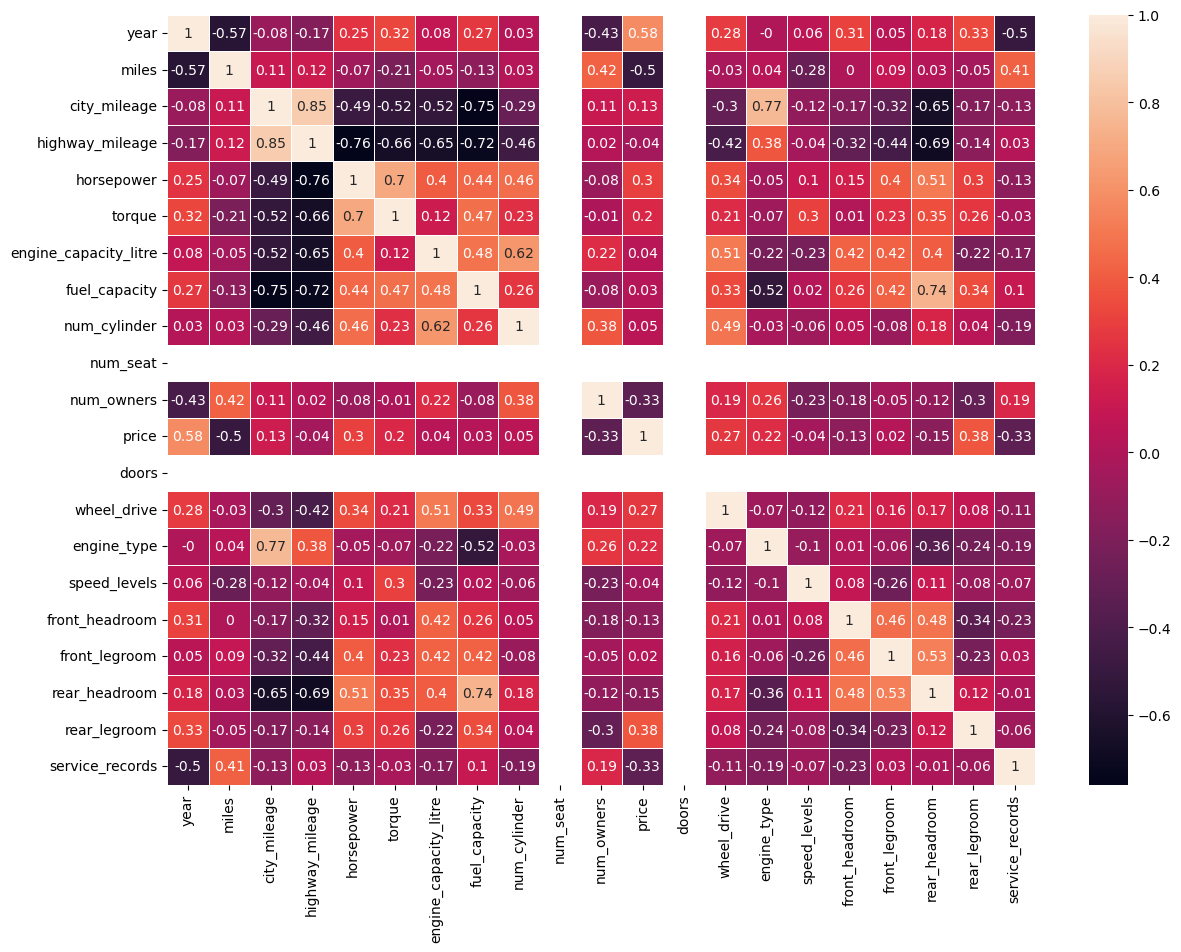

In [18]:
# Gráfico mapa de calor para avaliar relações entre price e os outros atributos
correlation_matrix = df_cars_copia.corr(numeric_only=True).round(2)

fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()

### Observando a correlação do preço pelos os outros atributos vemos que não temos um correlação muito forte só temos um correlação fraca negatova e moderada positiva.

**Então para fins educativos irei utilizar os atributos year, miles, num_owners, horsepower, rear_legroom, service_records, para prosseguirmos com nossa análises esse atributos serão relacionados com o preço**  

# Análise com gráficos

In [96]:
df_cars_copia

,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,...,type,doors,wheel_drive,engine_type,speed_levels,front_headroom,front_legroom,rear_headroom,rear_legroom,service_records
0,Chevrolet,Volt LT,2019,27173,43,42,149,294,1.5,8.9,...,sedan,4,2,1,6.0,37.8,42.1,35.8,34.7,4
1,Hyundai,Elantra SE,2017,76941,29,38,146,132,2.0,14.0,...,sedan,4,2,0,6.0,39.0,42.2,37.0,35.7,16
2,Ford,Focus,2014,97027,27,37,159,146,2.0,12.4,...,sedan,4,2,0,6.0,38.3,43.7,38.0,33.2,13
3,Honda,Civic,2016,95396,31,42,158,138,1.5,12.4,...,sedan,4,2,0,6.0,37.5,42.3,36.8,37.4,26
4,Hyundai,Elantra SE,2019,28405,29,38,147,132,2.0,14.0,...,sedan,4,2,0,6.0,39.0,42.2,37.0,35.7,5
5,Honda,Civic,2016,61459,31,41,158,138,2.0,12.4,...,sedan,4,2,0,6.0,37.5,42.3,36.8,37.4,13
6,Subaru,Legacy,2022,6811,27,35,182,176,2.5,18.5,...,sedan,4,4,0,6.0,39.4,42.8,37.2,39.5,6
7,Honda,Clarity,2018,29674,44,40,212,99,1.5,7.0,...,sedan,4,2,1,6.0,39.1,42.2,37.1,36.2,2
8,Volkswagen,Jetta,2019,25044,30,40,147,184,1.4,13.2,...,sedan,4,2,0,8.0,38.5,41.1,37.2,37.4,6
9,Volkswagen,Jetta,2017,26215,28,38,150,184,1.4,14.5,...,sedan,4,2,0,6.0,38.2,41.2,37.1,38.1,13


### **Análise Preço por Ano**

In [ ]:
# Instanciando o objeto Regressão Linear
lr = LinearRegression()

In [142]:
# Separando os dados em Variáveis independentes e dependente
X = df_cars_copia[['year','miles', 'horsepower', 'torque', 'engine_capacity_litre', 'wheel_drive','fuel_capacity', 'num_owners', 'num_cylinder', 'rear_legroom', 'front_legroom', 'front_headroom', 'rear_headroom', 'service_records', 'engine_type', 'engine_type', 'doors', 'num_seat']]

y = df_cars_copia[['price']]

In [143]:
# Separando dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
X_train

,year,miles,horsepower,torque,engine_capacity_litre,wheel_drive,fuel_capacity,num_owners,num_cylinder,rear_legroom,front_legroom,front_headroom,rear_headroom,service_records,engine_type,engine_type,doors,num_seat
32,2019,44371,152,145,2.0,4,13.2,2,4,36.5,43.1,39.8,37.2,7,0,0,4,5
2,2014,97027,159,146,2.0,2,12.4,3,4,33.2,43.7,38.3,38.0,13,0,0,4,5
27,2019,41799,158,138,2.0,2,12.4,1,4,37.4,42.3,39.3,37.1,4,0,0,4,5
11,2019,32270,174,162,1.5,2,12.4,1,4,37.4,42.3,37.5,36.8,4,0,0,4,5
6,2022,6811,182,176,2.5,4,18.5,1,4,39.5,42.8,39.4,37.2,6,0,0,4,5
33,2020,12944,228,258,2.0,2,13.2,1,4,37.4,41.1,38.5,37.2,5,0,0,4,5
19,2019,24250,147,184,1.4,2,13.2,1,4,37.4,41.1,38.5,37.2,8,0,0,4,5
29,2018,16581,158,138,2.0,2,12.4,2,4,37.4,42.3,37.5,36.8,4,0,0,4,5
10,2015,25939,143,129,1.8,2,13.2,1,4,36.2,42.0,37.9,36.2,15,0,0,4,5
0,2019,27173,149,294,1.5,2,8.9,3,4,34.7,42.1,37.8,35.8,4,1,1,4,5


In [144]:
lr.fit(X_train, y_train)

LinearRegression()

In [145]:
previsoes = lr.predict(X_test)
previsoes

array([[20734.4584356 ],
       [20850.77590342],
       [24515.1306128 ],
       [21051.11493789],
       [21744.60419685],
       [25420.35492016],
       [21459.43945392],
       [21176.12238204],
       [19402.22883035],
       [24513.0308381 ],
       [21005.78965353]])

In [146]:
resultado_1 = lr.score(X, y)
print(f'Coeficiente de Determinação (R²): {resultado_1}')
print(f'Interceptação: {lr.intercept_}')
# Resultado com o random_state = 25

Coeficiente de Determinação (R²): 0.7014037225779489
Interceptação: [-2089674.89334825]


In [147]:
coeficientes = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(lr.coef_))], axis=1)
coeficientes

,0,0
0,year,1083.204779
1,miles,-0.033640
2,horsepower,15.036650
3,torque,-6.509218
4,engine_capacity_litre,2077.691046
5,wheel_drive,1063.015605
6,fuel_capacity,-61.281010
7,num_owners,-1261.184430
8,num_cylinder,-509.822880
9,rear_legroom,477.972156


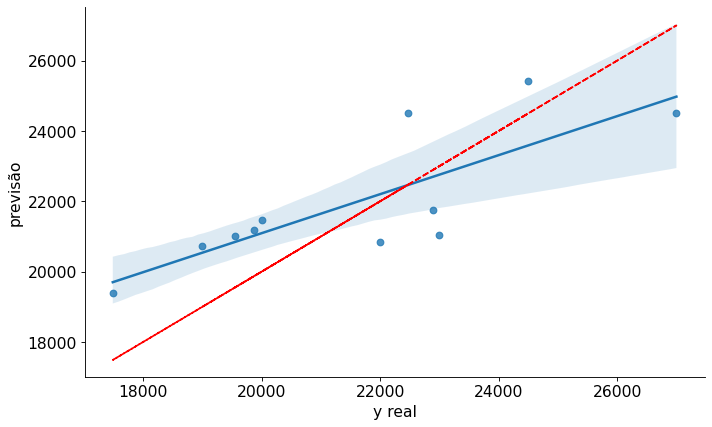

In [148]:
# Correlação de Ano por Preço

plt.figure(figsize=(10,6), dpi=80)
plt.rcParams.update({'font.size': 14})
ax = sns.regplot(x= y_test, y= previsoes)
ax.set(xlabel='y real', ylabel='previsão')
ax = plt.plot(y_test, y_test, '--r')
sns.despine()
plt.show()

In [149]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [150]:
# Avaliando o modelo
MAE = mean_absolute_error(y_test, previsoes)
MSE = mean_squared_error(y_test, previsoes)
r2 = r2_score(y_test, previsoes)
print('MAE',MAE) # Mean Absolute Error (MAE) é a média do valor absoluto dos erros.
print('MSE',MSE) # Erro Quadrático Médio (MSE) é a média dos erros quadráticos
print('r²',r2) # (R-quadrado)

MAE 1596.0726238844536
MSE 2746791.340390295
r² 0.5999639442417654
